In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Set display options to show all columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Find relationship strenght of the concrete and other Attributes
df = pd.read_csv("concrete.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: xlabel='cement', ylabel='count'>

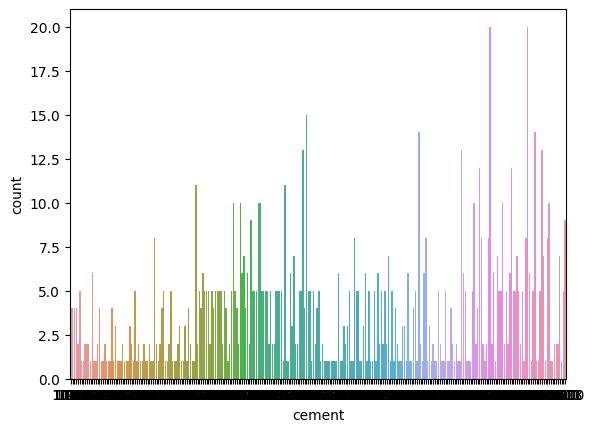

In [7]:
sns.countplot(x="cement", data=df)

In [41]:
df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [44]:
df.shape

(1030, 9)

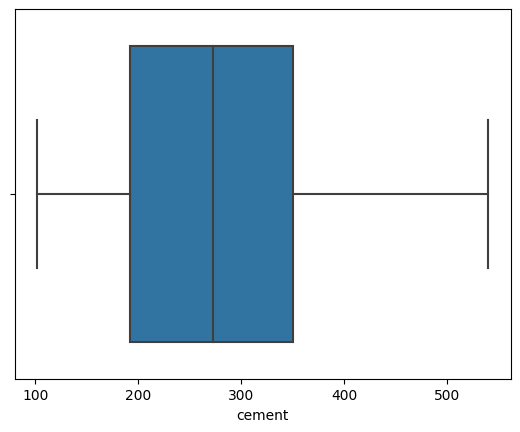

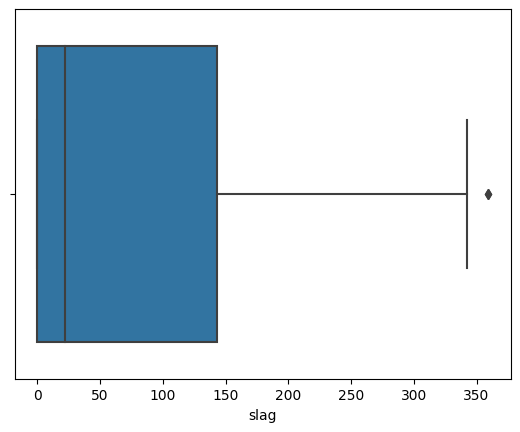

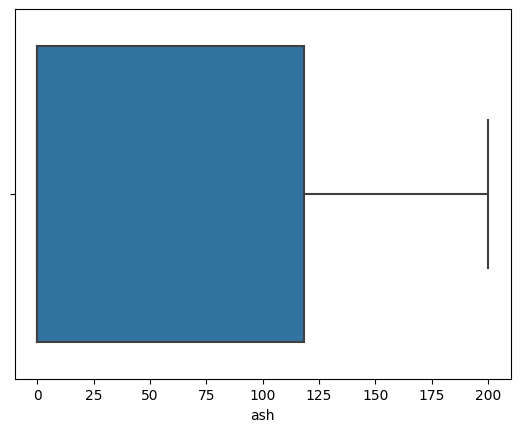

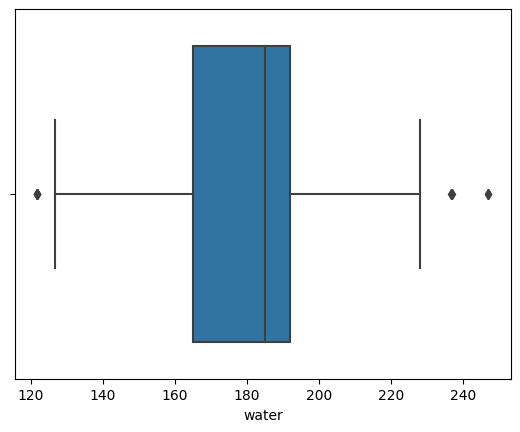

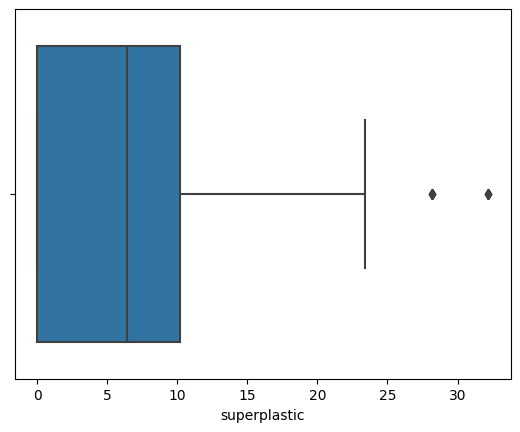

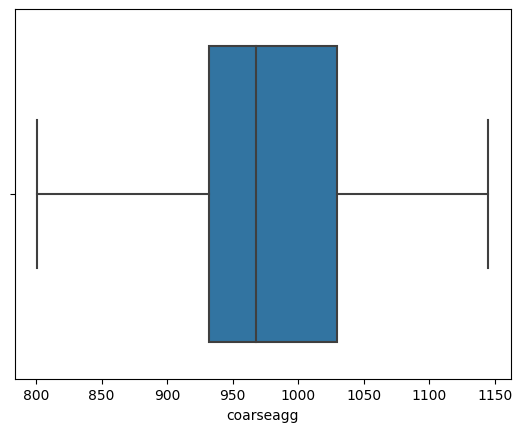

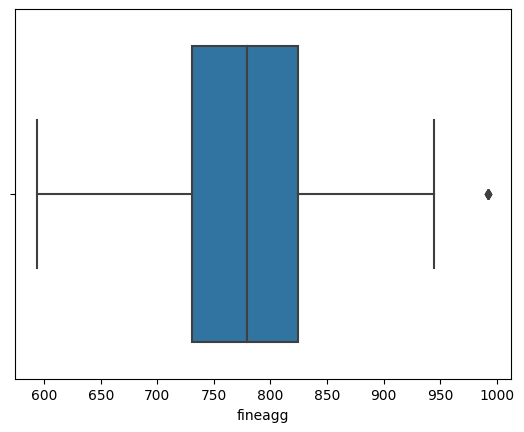

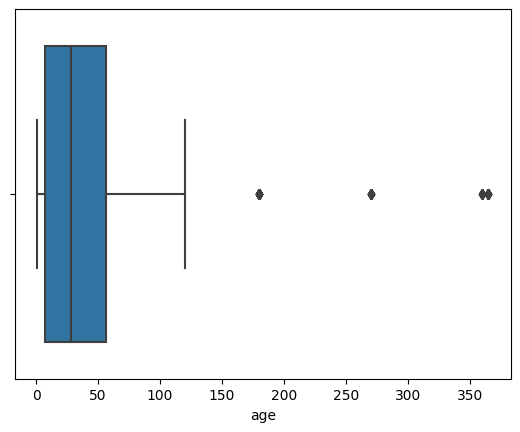

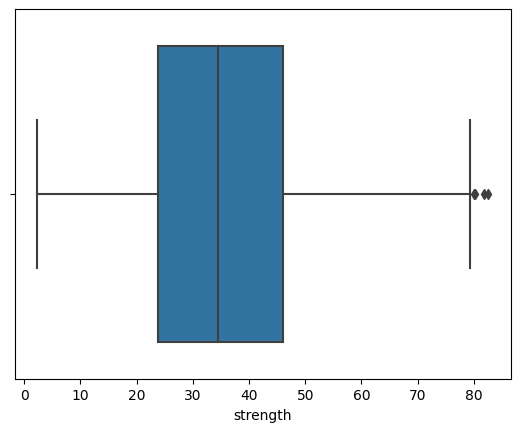

In [42]:
for col in df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [51]:
cleaned_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

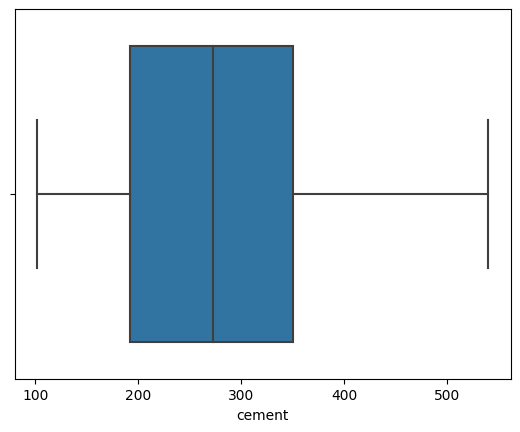

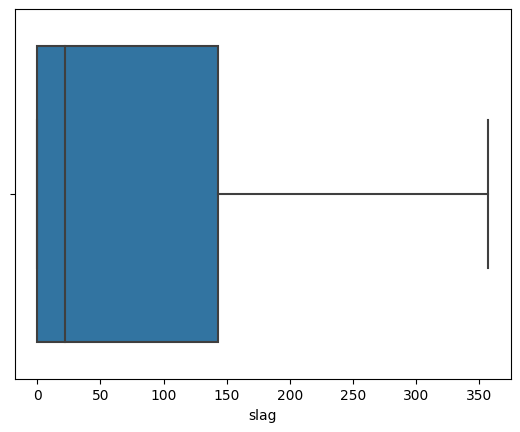

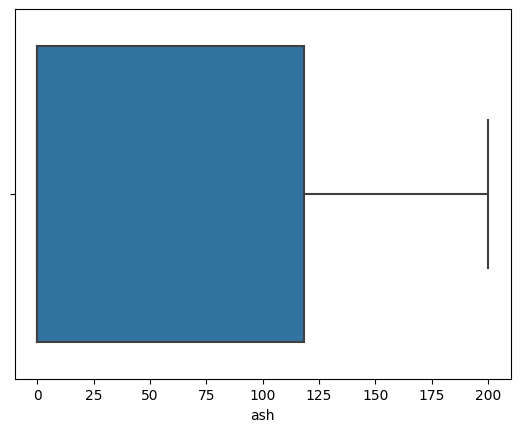

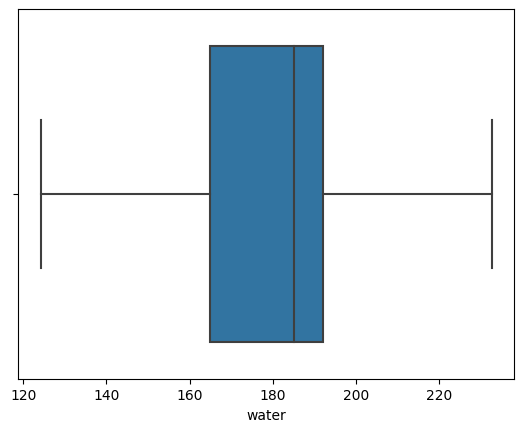

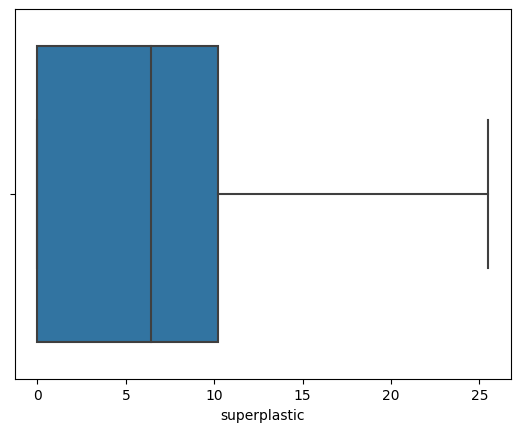

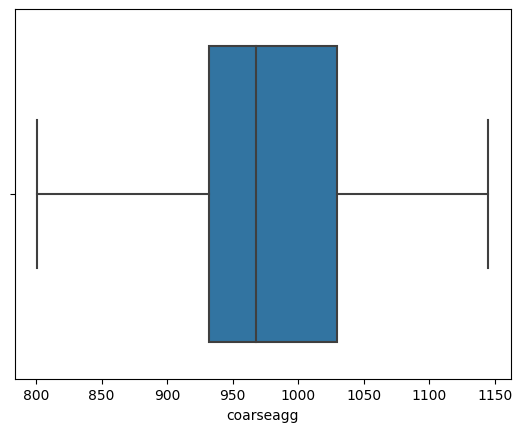

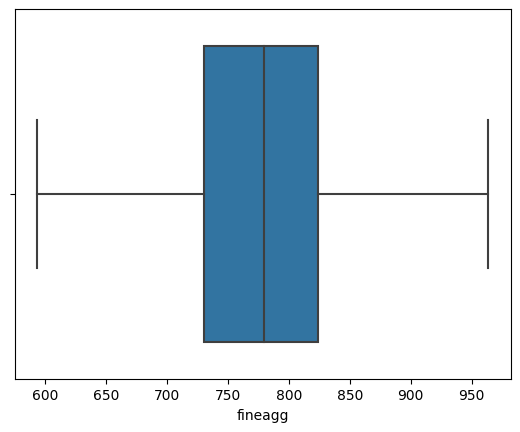

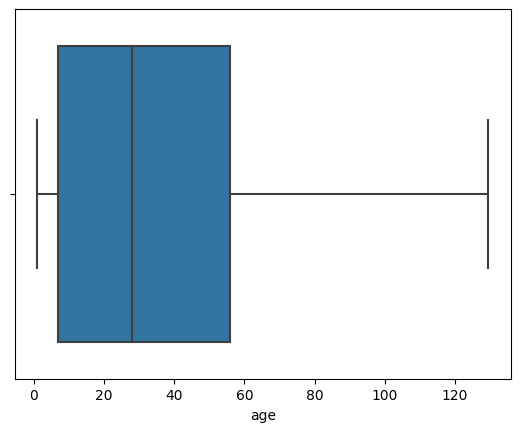

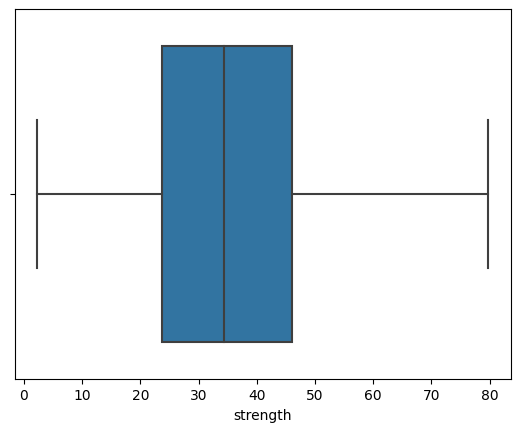

In [56]:
for col in cleaned_df.columns:
    sns.boxplot(x=col, data=df)
    plt.show()

In [58]:
print("==== Before === ")
print(df.corr())
print("==== After === ")
print(cleaned_df.corr())

==== Before === 
                cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275239 -0.397467 -0.081617      0.079619  -0.109349   
slag         -0.275239  1.000000 -0.323590  0.107031      0.043724  -0.284023   
ash          -0.397467 -0.323590  1.000000 -0.258379      0.395319  -0.009961   
water        -0.081617  0.107031 -0.258379  1.000000     -0.665260  -0.180249   
superplastic  0.079619  0.043724  0.395319 -0.665260      1.000000  -0.261624   
coarseagg    -0.109349 -0.284023 -0.009961 -0.180249     -0.261624   1.000000   
fineagg      -0.225311 -0.283263  0.080962 -0.448979      0.216947  -0.176542   
age           0.054325 -0.052703 -0.092704  0.189637     -0.122913   0.012295   
strength      0.498008  0.134621 -0.105577 -0.290969      0.366235  -0.165250   

               fineagg       age  strength  
cement       -0.225311  0.054325  0.498008  
slag         -0.283263 -0.052703  0.134621  
ash           0.080962 -0.092704 -0.1

In [ ]:
sns.pairplot(df)

In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-1.5*IQR
    higher_range = Q3+1.5*IQR
    return lower_range, higher_range

outliers_columns = ["age", "strength","fineagg","superplastic","water", "slag"]

cleaned_df = df
for outlier_col in outliers_columns:
    lower, upper = remove_outlier(df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]>upper, upper, cleaned_df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]<lower, lower, cleaned_df[outlier_col])
    
cleaned_df.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
330,167.4,129.9,128.6,175.5,7.8,1006.3,746.6,14.0,31.81
120,331.0,0.0,0.0,192.0,0.0,978.0,825.0,7.0,16.26
182,374.0,189.2,0.0,170.1,10.1,926.1,756.7,56.0,63.40
414,297.8,137.2,106.9,201.3,6.0,878.4,655.3,28.0,53.52
962,277.0,0.0,0.0,191.0,0.0,968.0,856.0,14.0,21.26


In [8]:
model_lr = LinearRegression()
Y=df["strength"]
X=df.drop(columns=["strength"], axis=1)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)

model_lr = LinearRegression()

In [13]:
model_lr.fit(X_train, Y_train)

LinearRegression()

In [14]:
model_lr.score(X_train, Y_train)

0.620520052755062

In [15]:
model_lr.fit(X_test, Y_test)
model_lr.score(X_test, Y_test)

0.6151468864454761

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


model=Sequential()
model.add(Dense(units=20,activation="relu",input_dim=8,kernel_initializer='uniform'))
# model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train, Y_train, batch_size=10, epochs=10, validation_split=0.1)

Epoch 1/10
65/65 [==============================] - 1s 4ms/step - loss: 723.9611 - val_loss: 217.8934
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 266.5210 - val_loss: 193.2224
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 232.7599 - val_loss: 164.4239
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 200.8145 - val_loss: 133.9492
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 157.8324 - val_loss: 97.4091
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 118.9647 - val_loss: 71.1067
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 100.9982 - val_loss: 66.6976
Epoch 8/10
65/65 [==============================] - 0s 2ms/step - loss: 94.9312 - val_loss: 69.5208
Epoch 9/10
65/65 [==============================] - 0s 2ms/step - loss: 93.4975 - val_loss: 61.9655
Epoch 10/10
65/65 [==============================] - 0s 2ms/step - loss: 92.3206 - val_lo

In [41]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

10/10 [==============================] - 0s 1ms/step


-4.3766070726156405

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

Y=cleaned_df["strength"]
X=cleaned_df.drop(columns=["strength"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)

model=Sequential()
model.add(Dense(units=6,activation="relu",input_dim=8,kernel_initializer='uniform'))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train, Y_train, batch_size=10, epochs=10, validation_split=0.1)

Epoch 1/10
65/65 [==============================] - 1s 5ms/step - loss: 1042.4796 - val_loss: 217.9865
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 268.7772 - val_loss: 196.5444
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 243.9450 - val_loss: 182.3644
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 226.1833 - val_loss: 166.8434
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 205.2384 - val_loss: 145.3688
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 178.2148 - val_loss: 123.9508
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 150.1697 - val_loss: 98.1893
Epoch 8/10
65/65 [==============================] - 0s 2ms/step - loss: 121.3006 - val_loss: 80.4919
Epoch 9/10
65/65 [==============================] - 0s 2ms/step - loss: 104.2098 - val_loss: 64.8445
Epoch 10/10
65/65 [==============================] - 0s 2ms/step - loss: 97.2783 - v

In [21]:


model=Sequential()
model.add(Dense(units=20,activation="relu",input_dim=8,kernel_initializer='uniform'))
model.add(Dense(units=20,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=5,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=5,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=5,kernel_initializer='uniform',activation="relu"))
model.add(Dense(units=1))

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=10, epochs=10, validation_split=0.1)

Epoch 1/10
65/65 [==============================] - 2s 5ms/step - loss: 1461.2122 - accuracy: 0.0000e+00 - val_loss: 858.0634 - val_accuracy: 0.0000e+00
Epoch 2/10
65/65 [==============================] - 0s 2ms/step - loss: 340.9598 - accuracy: 0.0000e+00 - val_loss: 203.8602 - val_accuracy: 0.0000e+00
Epoch 3/10
65/65 [==============================] - 0s 2ms/step - loss: 250.9301 - accuracy: 0.0000e+00 - val_loss: 195.3857 - val_accuracy: 0.0000e+00
Epoch 4/10
65/65 [==============================] - 0s 2ms/step - loss: 238.2885 - accuracy: 0.0000e+00 - val_loss: 187.9264 - val_accuracy: 0.0000e+00
Epoch 5/10
65/65 [==============================] - 0s 2ms/step - loss: 227.1158 - accuracy: 0.0000e+00 - val_loss: 178.5648 - val_accuracy: 0.0000e+00
Epoch 6/10
65/65 [==============================] - 0s 2ms/step - loss: 215.3073 - accuracy: 0.0000e+00 - val_loss: 170.5680 - val_accuracy: 0.0000e+00
Epoch 7/10
65/65 [==============================] - 0s 2ms/step - loss: 203.7902 - accu

In [42]:
from sklearn.metrics import r2_score
Y_pred = model.predict(X_test)
r2_score(Y_test, Y_pred)

10/10 [==============================] - 0s 2ms/step


-4.3766070726156405

In [64]:
outliers_columns = ["age", "fineagg","superplastic","water", "slag"]

cleaned_df = df
for outlier_col in outliers_columns:
    lower, upper = remove_outlier(df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]>upper, upper, cleaned_df[outlier_col])
    cleaned_df[outlier_col] = np.where(cleaned_df[outlier_col]<lower, lower, cleaned_df[outlier_col])
    
cleaned_df.sample(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
269,251.4,0.0,118.3,188.5,5.8,1028.4,757.7,56.0,36.97
476,439.0,177.0,0.0,186.0,11.1,884.9,707.9,91.0,73.30
310,246.8,0.0,125.1,143.3,12.0,1086.8,800.9,14.0,42.22
765,146.5,114.6,89.3,201.9,8.8,860.0,829.5,28.0,19.99
664,173.0,116.0,0.0,192.0,0.0,946.8,856.8,7.0,11.39


In [65]:
model_lr = LinearRegression()
Y=cleaned_df["strength"]
X=cleaned_df.drop(columns=["strength"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)

model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
model_lr.score(X_train, Y_train)

0.7286793795930391

In [66]:
model_lr.fit(X_test, Y_test)
model_lr.score(X_test, Y_test)

0.734184440484937